# Day 20:30 daily statistics - Residuos P2

$\color{red}{\text{Exercício 6}}$ - **Retirado do livro: Análise de Modelos de Regressão Linear com Aplicações, de Charnet, Freire, Charnet e Bonvino** Considere o seguinte conjunto de dados:

| X      | Y     |
|--------|-------|
| 10,875 | 71,05 |
| 11,000 | 70,59 |
| 11,125 | 69,21 |
| 11,500 | 68,82 |
| 12,000 | 69,24 |
| 12,250 | 68,14 |
| 12,500 | 67,80 |
| 13,750 | 67,03 |
| 13,750 | 67,42 |
| 14,000 | 66,94 |
| 14,500 | 68,80 |
| 15,500 | 65,14 |
| 16,250 | 64,04 |
| 17,000 | 63,98 |
| 19,000 | 62,96 |

+ a) Ajuste um MRLS de Y em X;
+ b) Teste a significância do modelo e calcule o coeficiente de determinação;
+ c) Identifique possíveis observações discrepantes;
+ d) Verifique a normalidade dos resíduos;
+ e) Faça o gráfico dos resíduos padronizados contra os $Y's$ estimados. Comente;
+ f) Ajuste outro MRLS de Y em X desconsiderando possíveis observações discrepantes;
+ g) Considere a transformação $T=\frac{1}{Y}$, ajuste um MRLS de T em X, considerando as mesmas observações usadas em (f);
+ h) Faça a análise de resíduos do modelo em (g), verificando normalidade;
+ i) Repita o item (e) para o modelo em (g);
+ j) Compare os três modelos ajustados, com relação a coeficiente de determinação e análise de resíduos.

$\color{red}{\text{a)}}$ **Ajuste um MRLS de Y em X**. O modelo é apresentado a seguir: 

In [1]:
#Entrada de dados
x=c(10.875, 11, 11.125, 11.5, 12, 12.25, 12.5, 13.75, 13.75, 14, 14.5, 15.5, 16.25, 17, 19)
y=c(71.05, 70.59, 69.21, 68.82, 69.24, 68.14, 67.8, 67.03, 67.42, 66.94, 68.80, 65.14, 64.04, 63.98, 62.96)

#Ajustando o modelo aos dados
dados6=data.frame(x,y)
mod1=lm(y~x,data=dados6)
summary(mod1)


Call:
lm(formula = y ~ x, data = dados6)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9356 -0.6013 -0.2886  0.4175  2.1749 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 80.29314    1.31054  61.267  < 2e-16 ***
x           -0.94262    0.09451  -9.974 1.85e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.859 on 13 degrees of freedom
Multiple R-squared:  0.8844,	Adjusted R-squared:  0.8755 
F-statistic: 99.48 on 1 and 13 DF,  p-value: 1.855e-07


O modelo estimado é dado por $\hat{y}=80,29-0.9426X$, sendo considerado significativo para a realização de inferências. 

$\color{red}{\text{b)}}$ **Teste a significância do modelo e calcule o coeficiente de determinação:** Para isso determinaremos a anova para os dados apresentados acima. 

In [2]:
#Analise de variância para o modelo
anova(mod1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
x,1,73.405755,73.4057546,99.4768,1.854825e-07
Residuals,13,9.592939,0.7379184,NA,NA


Através da análise de variância acima, pode-se concluir que o modelo é significativo para realizar inferências. O cálculo no R para determinar isoladamente o coeficiente de determianção é apresentado a seguir:

In [3]:
cal=summary(mod1)
r2=cal$r.squared
cat("O valor do coeficiente de determinação é dado por",r2*100,"%","\n")

O valor do coeficiente de determinação é dado por 88.44206 % 


$\color{red}{\text{c)}}$ **Identifique possíveis observações discrepantes:** Para isso utilizaremos o *boxplot* para o conjunto de dados

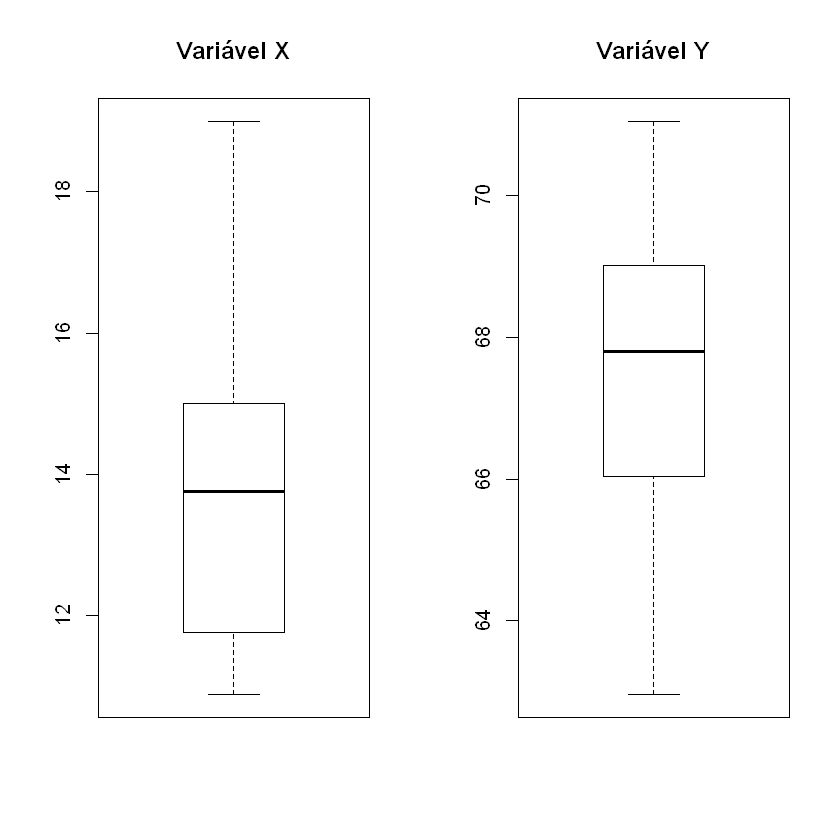

In [4]:
par(mfrow=c(1,2))
boxplot(x,main="Variável X")
boxplot(y,main="Variável Y")

Após análise dos boxplot acima não foi observado informações discrepantes nos conjuntos de dados X e Y.

$\color{red}{\text{d)}}$ **A normalidade dos resíduos** é apresentada a seguir através do teste de **Shapiro Wilk**:

In [5]:
#Teste de normalidade dos resíduos
shapiro.test(residuals(mod1))


	Shapiro-Wilk normality test

data:  residuals(mod1)
W = 0.87283, p-value = 0.03714


A formulação para o teste de normalidade usada é apresentada a seguir:

$$H_0: \text{Residuos normalmente distribuidos}$$
$$H_1: \text{Residuos nao normalmente distribuidos}$$

Através da análise de Shaprio-Wilk, pode-se concluir que os resíduos não apresentam a suposição de normalidade, visto que o p-valor associado ao teste foi de 0,03714 ficando abaixo do nível de 5% de significância usado para o teste. 

$\color{red}{\text{e)}}$ **Faça o gráfico dos resíduos padronizados contra os Y's estimados**. Comente:

previstos,residuos_padronizados
70.04215,1.2808905
69.92432,0.8418863
69.80649,-0.7509014
69.45301,-0.7870968
68.98170,0.3170069
68.74605,-0.7399616
68.51039,-0.8636579
67.33211,-0.3640569
67.33211,0.1059039
67.09646,-0.1886661


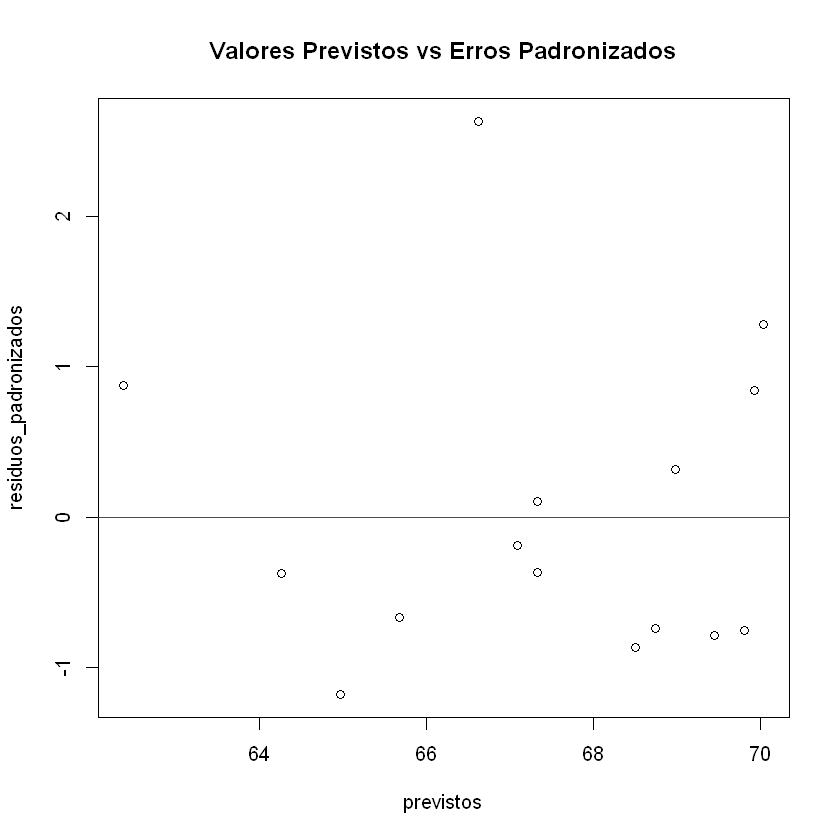

In [6]:
#Obtenção dos residuos padronizados pelo comando rstandard
residuos_padronizados=rstandard(mod1)

#Y previstos
previstos=predict(mod1)
resultado=cbind(previstos,residuos_padronizados)
resultado

#Grafico do residuos x previstos
plot(resultado,main="Valores Previstos vs Erros Padronizados")
abline(h=0,col="red")


O gráfico dos resíduos versos os valores padronizados não mostram violação da suposição de homogeneidade da variância dos resíduos.

$\color{red}{\text{f)}}$ **Ajuste outro MRLS de Y em X desconsiderando possíveis observações discrepantes**, para esta análise sugou-se que o resíduo padronizado acima da faixa 2 poderia ser obtido através de uma informação discrepante, para isso optou-se por remover a décima primeira informação do conjunto de dados que equivale ao par ordenador (14.5 e 68.80)

In [7]:
#Entrada de dados
x=c(10.875, 11, 11.125, 11.5, 12, 12.25, 12.5, 13.75, 13.75, 14, 15.5, 16.25, 17, 19)
y=c(71.05, 70.59, 69.21, 68.82, 69.24, 68.14, 67.8, 67.03, 67.42, 66.94, 65.14, 64.04, 63.98, 62.96)

#Ajustando o modelo aos dados
dados2n=data.frame(x,y)
mod2=lm(y~x,data=dados2n)
summary(mod2)


Call:
lm(formula = y ~ x, data = dados2n)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.71753 -0.49574 -0.09808  0.34330  1.09840 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 80.46053    0.93316   86.22  < 2e-16 ***
x           -0.96634    0.06752  -14.31 6.64e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6109 on 12 degrees of freedom
Multiple R-squared:  0.9447,	Adjusted R-squared:   0.94 
F-statistic: 204.8 on 1 and 12 DF,  p-value: 6.642e-09


Os novo modelo continua sendo significativo, após a remoção do par ordenado (14,5 e 68,80) o modelo aumentou o coeficiente de determinação passando para 94,47%, tornando-se um modelo mais explicativo para o conjunto de dados em análise.

$\color{red}{\text{g)}}$ **Considere a transformação $T=1/Y$, ajuste um MRLS de T em X, considerando as mesmas observações usadas em (f)**

In [8]:
#Ajustando o modelo para a transformação T = 1/Y
x=c(10.875, 11, 11.125, 11.5, 12, 12.25, 12.5, 13.75, 13.75, 14, 15.5, 16.25, 17, 19)
y=c(71.05, 70.59, 69.21, 68.82, 69.24, 68.14, 67.8, 67.03, 67.42, 66.94, 65.14, 64.04, 63.98, 62.96)
T=1/y

base3=data.frame(x,T)
mod3=lm(T~x,data=base3)
summary(mod3)


Call:
lm(formula = T ~ x, data = base3)

Residuals:
       Min         1Q     Median         3Q        Max 
-2.068e-04 -8.118e-05  1.431e-05  1.086e-04  1.650e-04 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.192e-02  1.886e-04   63.20  < 2e-16 ***
x           2.175e-04  1.364e-05   15.94 1.94e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0001234 on 12 degrees of freedom
Multiple R-squared:  0.9549,	Adjusted R-squared:  0.9511 
F-statistic: 254.1 on 1 and 12 DF,  p-value: 1.936e-09


O novo modelo obtido após a transformação dos dados é dado por $\hat{y}=1.192e-02+2.175e-04X$, sendo considerado um modelo significativo e com coeficiente de determinação ($R^2=95,49$%) maior que os outros modelos obtidos para o mesmo problema. 

$\color{red}{\text{h)}}$ **Faça a análise de resíduos do modelo em (g), verifiando normalidade**

In [9]:
#Teste de normalidade
shapiro.test(residuals(mod3))


	Shapiro-Wilk normality test

data:  residuals(mod3)
W = 0.93604, p-value = 0.37


O teste de Shapiro-Wilk apresenta um p-valor de 0,37, indicando que a hipótese nula de normalidade não deve ser rejeitada ao nível de 5% de significância, ou seja, os resíduos distribuem-se normalmente. 

$\color{red}{\text{i)}}$ **Repita o item (e) para o modelo em (g)**

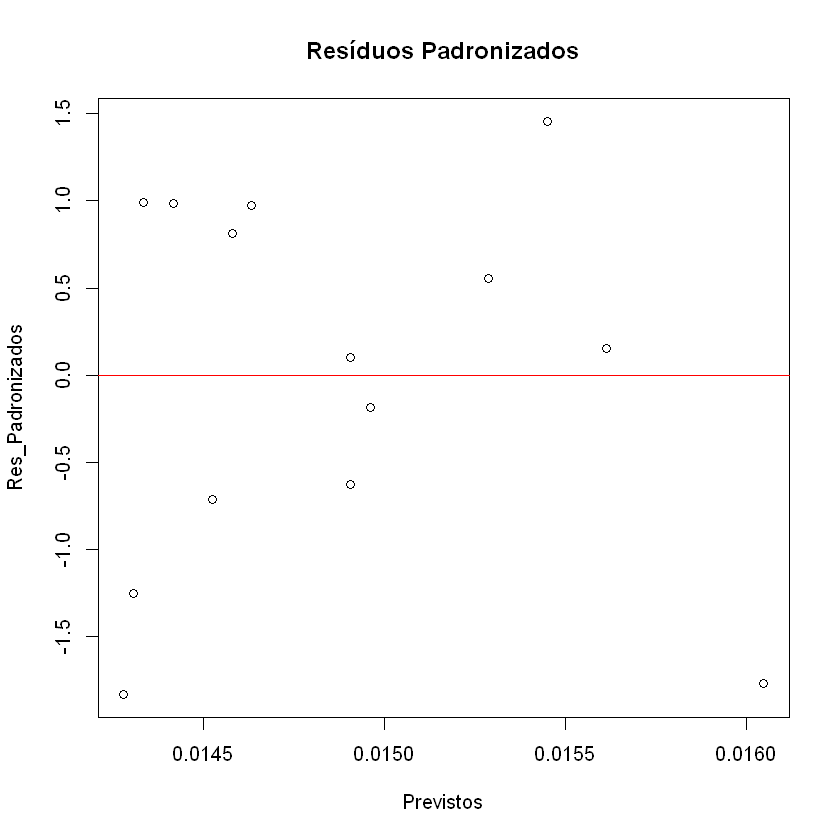

In [10]:
#Resíduos padronizados 
Res_Padronizados=rstandard(mod3)

#Valores Previstos
Previstos=predict(mod3)

#Gráfico
plot(Previstos,Res_Padronizados,main="Resíduos Padronizados")
abline(h=0,col="red")

Os resíduos padronizados não apresentaram quebra dos pressupostos exigidos para o modelo.

$\color{red}{\text{j)}}$ **Compare os três modelos ajustados, com relação a coeficiente de determinação e análise de resíduos**

In [11]:
#Coeficientes de determianção dos modelos
resp1=summary(mod1); R2_mod1=resp1$r.squared
resp2=summary(mod2); R2_mod2=resp2$r.squared
resp3=summary(mod3); R2_mod3=resp3$r.squared
cbind(R2_mod1,R2_mod2,R2_mod3)


R2_mod1,R2_mod2,R2_mod3
0.8844206,0.9446556,0.9549025


O terceiro modelo apresentou o maior coeficiente de determinação, não apresentou violação na análise dos resíduos e poderia ser escolhido para ser utilizado para realizar inferências. 

$\color{red}{\text{Exercício 7}}$ - **Retirado do livro: Análise de Modelos de Regressão Linear com Aplicações, de Charnet, Freire, Charnet e Bonvino** CEm uma agência de correios de uma cidade, o gerente realizou um estudo para relacionar o peso do total de correspondências recebidas por dia com o número efetivo de correspondências. O levantamento feito em 11 dias, apresentou os seguintes dados:

| Pesos (Kg) | Correspondências (1.000) |
|:----------:|:------------------------:|
|     10     |            4,1           |
|     35     |            6,5           |
|     13     |            3,6           |
|     34     |            6,7           |
|     21     |            5,2           |
|     24     |            5,3           |
|     18     |            4,7           |
|     29     |            6,3           |
|     16     |            4,1           |
|     25     |            5,8           |
|     20     |            5,4           |

+ a) Ajuste um MRLS que explique o número de correspondências em termos do peso total;
+ b) Faça as análises usuais para o modelo e calcule o coeficiente de determianção;
+ c) Verifique a normalidade dos resíduos;
+ d) Faça o gráfico dos resíduos padronizados contra a variável regressora. Comente.
+ e) Considere duas transformações $T_1=\log(Y)$ e $T_2=\frac{1}{Y}$. Ajuste um MRLS para cada uma das transformações em termos da regressora peso;
+ f) Repita os itens (b), (c) e (d) para os dois modelos de (e);
+ g) Compare os três gráficos de resíduos comentando-os;
+ h) Ajuste um MRLS do número de correspondência em termos do peso ao quadrado, calcule o coeficiente de determinação e compare com o dos outros modelos;
+ i) Faça o gráfico dos resíduos padronizados contra a regressora do modelo em (h);
+ j) Desconsidere a observação número um do conjunto de dados e repita os itens de (a) a (i). Comente os resultados com os encontrados nesses itens.

$\color{red}{\text{a)}}$ **Ajuste um MRLS que explique o número de correspondências em termos do peso total**

In [12]:
#Entrando com os dados
pesos=c(10,35,13,34,21,24,18,29,16,25,20)
corres=c(4.1,6.5,3.6,6.7,5.2,5.3,4.7,6.3,4.1,5.8,5.4)
model1=data.frame(pesos,corres)

#Ajuste do modelo 1
modelo1=lm(corres~pesos,data=model1)
summary(modelo1)


Call:
lm(formula = corres ~ pesos, data = model1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.51122 -0.22949  0.02007  0.22631  0.43254 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.52107    0.29891   8.434 1.45e-05 ***
pesos        0.12232    0.01268   9.647 4.82e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3248 on 9 degrees of freedom
Multiple R-squared:  0.9118,	Adjusted R-squared:  0.902 
F-statistic: 93.06 on 1 and 9 DF,  p-value: 4.823e-06


O modelo estimado é dado por $\hat{y}=2,52107+0,12232X$, indicando que para cada aumento no peso em uma unidade o número de correspondência aumenta em 0,12232. O modelo estimado é significativo para a realização de inferências.

$\color{red}{\text{b)}}$ **Faça as análises usuais para o modelo e calcule o coeficiente de determinação:** O modelo possui parâmetros significativos, além de ser significativo para a realização de inferências. Ainda é possível dizer que o peso explica em 91,18% do valor do número de correspondência. Além disso, $\hat{\sigma}=0,3248$, indicando uma variação em torno de 0,32 em torno da reta estimada.

In [13]:
#Cálculo do coeficiente de determinação para o modelo1
mod1=summary(modelo1)
R2_mod1=mod1$r.squared;
cat("Um dos cálculos do coeficiente de determinação é apresentado acima e o valor encontrado é",round(R2_mod1*100,2),"%",", uma outra maneira é determinar o quadrado da correlação",cor(pesos,corres)," dado por 
cor^2 sendo igual a",cor(pesos,corres)^2)

Um dos cálculos do coeficiente de determinação é apresentado acima e o valor encontrado é 91.18 % , uma outra maneira é determinar o quadrado da correlação 0.9548912  dado por 
cor^2 sendo igual a 0.9118172

$\color{red}{\text{c)}}$ **Verifique a normalidade dos resíduos**

In [14]:
#Teste de Normalidade dos resíduos estimados
shapiro.test(residuals(modelo1))


	Shapiro-Wilk normality test

data:  residuals(modelo1)
W = 0.96234, p-value = 0.8006


Através do teste de **Shapiro-Wilk**, constatou-se que os resíduos distribuiem-se normalmente. A hipótese testada é apresentada a seguir:

$$H_0: Normal$$
$$H_1: \text{Outra distribuicao}$$

Portanto, visto que o p-valor=0,8006, não existem evidências amostrais suficientes ao nível de 5% de significância que nos levem a rejeição da hipótese nula, ou seja, os resíduos distribuem-se normalmente.

$\color{red}{\text{d)}}$ **Faça o gráfico dos resíduos padronizados contra a variável regressora**

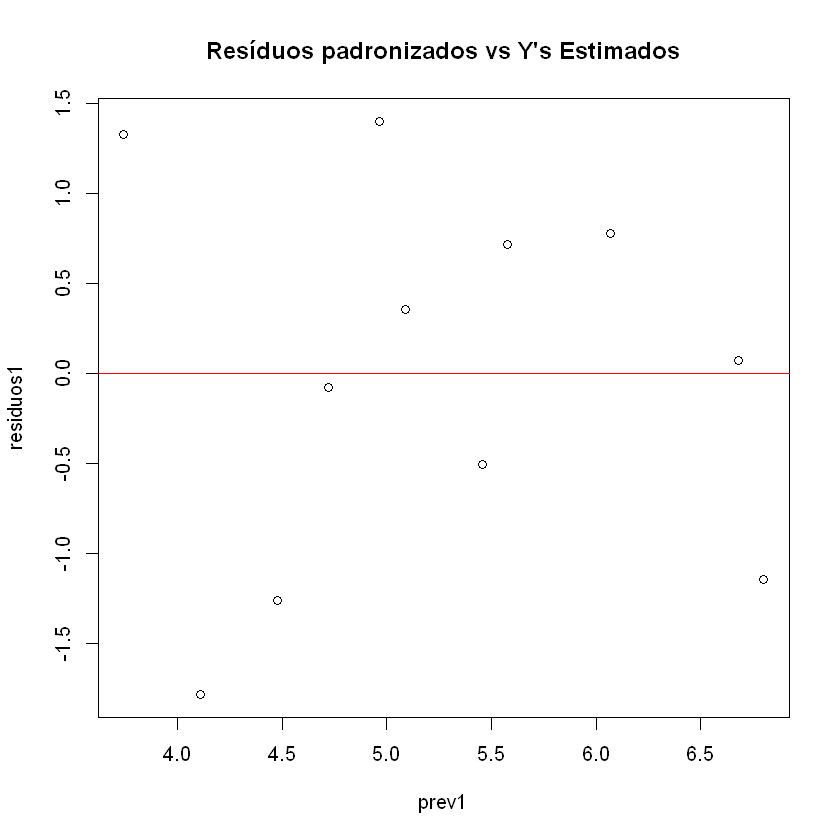

In [15]:
#Residuos padronizados
residuos1=rstandard(modelo1)
prev1=predict(modelo1)

#Gráfico
plot(prev1,residuos1,main="Resíduos padronizados vs Y's Estimados")
abline(h=0,col="red")

O gráfico dos resíduos padronizados versus a variável regressora estimada não apresenta violação das pressuposições básicas (falta de constância da variância).

$\color{red}{\text{e)}}$ **Considere duas transformações $T_1=\log(Y)$ e $T_2=\frac{1}{Y}$, ajuste um MRLS para cada uma das transformações em termos da regressora peso.**

In [16]:
#Entrando com os dados
pesos=c(10,35,13,34,21,24,18,29,16,25,20)
corres=c(4.1,6.5,3.6,6.7,5.2,5.3,4.7,6.3,4.1,5.8,5.4)
T1=log(corres)
model2=data.frame(pesos,T1)

#Ajuste do modelo 2
modelo2=lm(T1~pesos,data=model2)
summary(modelo2)


Call:
lm(formula = T1 ~ pesos, data = model2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.13734 -0.04238  0.01044  0.04815  0.10174 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.109258   0.069362  15.992 6.46e-08 ***
pesos       0.023770   0.002942   8.079 2.05e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07537 on 9 degrees of freedom
Multiple R-squared:  0.8788,	Adjusted R-squared:  0.8653 
F-statistic: 65.27 on 1 and 9 DF,  p-value: 2.047e-05


O modelo 2 apresenta a seguinte equação de regressão estimada $\hat{y}=1,1092+0,023X$ com um coeficiente de determinação de 87,88%

In [17]:
#Terceiro modelo de regressão

T2=1/(corres)
model3=data.frame(pesos,T2)

#Ajuste do modelo 3
modelo3=lm(T2~pesos,data=model3)
summary(modelo3)



Call:
lm(formula = T2 ~ pesos, data = model3)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.023626 -0.011976 -0.005499  0.011273  0.035881 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.303341   0.016643  18.226 2.06e-08 ***
pesos       -0.004726   0.000706  -6.695 8.91e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01809 on 9 degrees of freedom
Multiple R-squared:  0.8328,	Adjusted R-squared:  0.8142 
F-statistic: 44.82 on 1 and 9 DF,  p-value: 8.908e-05


O terceiro modelo é dado por $\hat{y}=0,303341-0,004726X$ com um coeficiente de determinação dado por $R^2=83,28\%$. 

$\color{red}{\text{f)}}$ **Repita os itens (b), (c) e (d) para os dois modelos de (e)**

Para o modelo $T1=\log(Y)$, temos:

In [18]:
#Calcule o coeficiente de determinação para o modelo T1
mod_T1=summary(modelo2)
R2_T1=mod_T1$r.squared
cat("O coeficiente de determinação para o modelo T1 é",round(R2_T1*100,2),"%")

O coeficiente de determinação para o modelo T1 é 87.88 %

O modelo T1 é dado por $\hat{y}=1,10+0,023X$, indicando que para cada aumento de uma unidade no peso o número de correspondência aumenta em média 0,023. O modelo estimado para T1 é considerado significativo para a realização de inferências.

In [19]:
#Calcule o coeficiente de determinação para o modelo T2
modelo3=lm(T2~pesos,data=model3)
mod_T2=summary(modelo3)
R2_T2=mod_T2$r.squared
cat("O coeficiente de determinação para o modelo T2 é",round(R2_T2*100,2),"%")

O coeficiente de determinação para o modelo T2 é 83.28 %

O modelo T2 apresenta coeficientes significativos e coeficiente de determinação de 83,28%, indicando que a taxa de pesos explica em 83,28% o número de correspondência atribuida ao modelo T2. 

A normalidade dos resíduos para o modelo T1 e T2 são apresentadas abaixo:

In [20]:
#normalidade para o modelo T1
shapiro.test(residuals(modelo2))


	Shapiro-Wilk normality test

data:  residuals(modelo2)
W = 0.95522, p-value = 0.7109


O teste de Shapiro-Wilk informa que os resíduos para o modelo T1 distribui-se normalmente, visto que o p-valor associado ao teste não rejeita a hipótese nula de normalidade nos resíduos. O mesmo teste é apresentado para o modelo T2:

In [21]:
#Teste de normalidade para o modelo T2
shapiro.test(residuals(modelo3))


	Shapiro-Wilk normality test

data:  residuals(modelo3)
W = 0.93102, p-value = 0.4212


O teste de Shapiro-Wilk não rejeita a hipótese nula associada a normalidade dos resíduos, visto que o p-valor associado ao teste é de 0,4212, ou seja, os resíduos para o modelo T2 distribui-se normalmente.

O gráfico dos resíduos padronizados dos modelos T1 e T2 são apresentados abaixo:

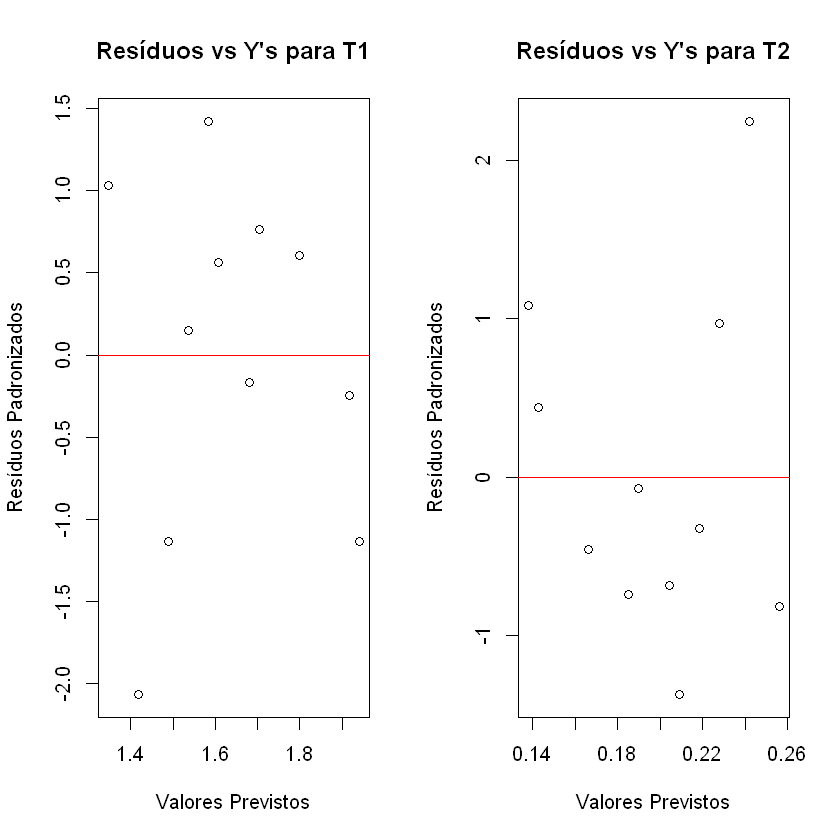

In [22]:
#Resíduos padronizados para o modelo T1
res_T1=rstandard(modelo2)
pre_T1=predict(modelo2)

#Resíduos padronizados para o modelo T2
res_T2=rstandard(modelo3)
pre_T2=predict(modelo3)

#Agrupando os gráficos
par(mfrow=c(1,2))
plot(pre_T1,res_T1,main="Resíduos vs Y's para T1",xlab="Valores Previstos",ylab="Resíduos Padronizados")
abline(h=0,col="red")
plot(pre_T2,res_T2,main="Resíduos vs Y's para T2",xlab="Valores Previstos",ylab="Resíduos Padronizados")
abline(h=0,col="red")

$\color{red}{\text{g)}}$ **Compare os três gráficos de resíduos comentando-os:** Os três gráficos não apresentam quebra da suposição de variância constante nos resíduos.

$\color{red}{\text{h)}}$ **Ajuste um MRLS do número de correspondência em termos do peso ao quadrado, calcule o coeficiente de determinação e compare com o dos outros modelos**

In [23]:
#Entrando com os dados
pesos=c(10,35,13,34,21,24,18,29,16,25,20)
corres=c(4.1,6.5,3.6,6.7,5.2,5.3,4.7,6.3,4.1,5.8,5.4)
pq=pesos^2

dados4=data.frame(corres,pq)
modelo4=lm(corres~pq,data=dados4)
summary(modelo4)


Call:
lm(formula = corres ~ pq, data = dados4)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.65712 -0.22950  0.01922  0.28662  0.55253 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.8252111  0.2189175  17.473 2.98e-08 ***
pq          0.0025556  0.0003304   7.736 2.89e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3955 on 9 degrees of freedom
Multiple R-squared:  0.8693,	Adjusted R-squared:  0.8547 
F-statistic: 59.84 on 1 and 9 DF,  p-value: 2.892e-05


O coeficiente de determinação para o novo modelo é de 86,93%.  Uma comparação entre os três modelos anteriores é apresentada a seguir:

In [24]:
#Comparação entre os coeficientes de determinação
mod_T=summary(modelo1);  R2_T=mod_T$r.squared
mod_T1=summary(modelo2); R2_T1=mod_T1$r.squared
mod_T2=summary(modelo3); R2_T2=mod_T2$r.squared
mod_T3=summary(modelo4); R2_T3=mod_T3$r.squared
resposta_final=data.frame(R2_T,R2_T1,R2_T2,R2_T3)
resposta_final



R2_T,R2_T1,R2_T2,R2_T3
0.9118172,0.8788126,0.8327717,0.8692678


Ao analisar os coeficientes de determinação é possível perceber que o maior coeficiente é o associado ao primeiro modelo.

$\color{red}{\text{i)}}$ **Faça o gráfico dos resíduos padronizados contra a regressora do modelo em (h)**

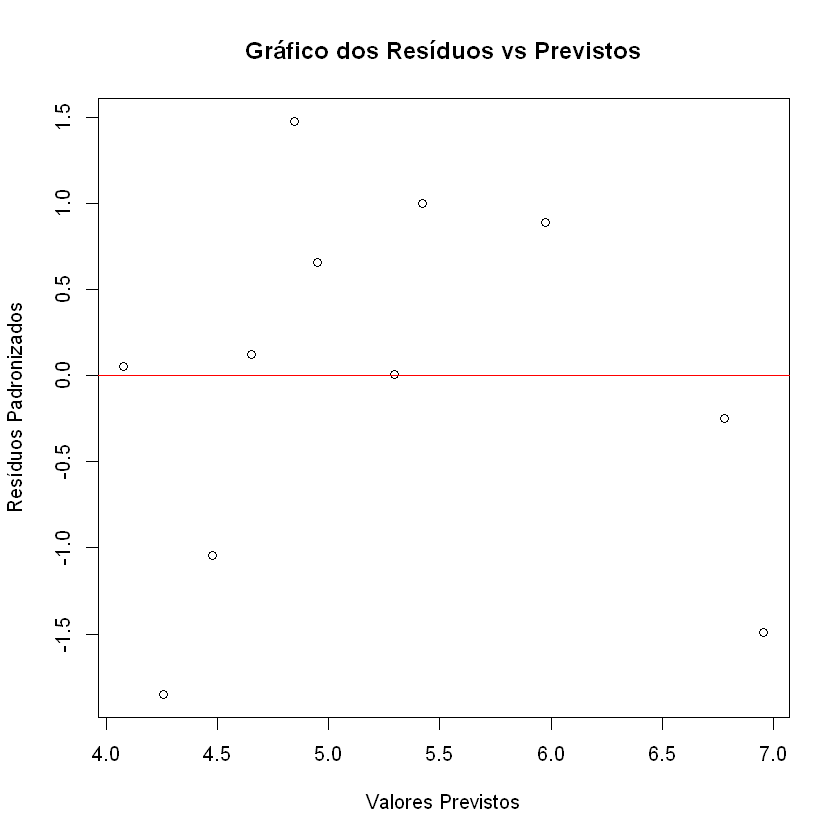

In [25]:
res4=rstandard(modelo4)
prev4=predict(modelo4)
plot(prev4,res4,main="Gráfico dos Resíduos vs Previstos",xlab="Valores Previstos",ylab="Resíduos Padronizados")
abline(h=0,col="red")

$\color{red}{\text{j)}}$ **Desconsidere a observação número um do conjunto de dados e repita os itens de (a) a (i). Comente os resultados com os encontrados nesse itens.**

In [26]:
#Entrando com os dados
pesos=c(35,13,34,21,24,18,29,16,25,20)
corres=c(6.5,3.6,6.7,5.2,5.3,4.7,6.3,4.1,5.8,5.4)
pq=pesos^2

dados4=data.frame(corres,pq)
modelo4=lm(corres~pq,data=dados4)
summary(modelo4)


Call:
lm(formula = corres ~ pq, data = dados4)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.65173 -0.30159  0.02788  0.30686  0.55606 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.8184781  0.2653011  14.393 5.31e-07 ***
pq          0.0025636  0.0003821   6.709 0.000151 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4194 on 8 degrees of freedom
Multiple R-squared:  0.8491,	Adjusted R-squared:  0.8302 
F-statistic: 45.01 on 1 and 8 DF,  p-value: 0.0001513


Após a exclusão da primeira observação o novo modelo é dado por $\hat{y}=3,81+0,0025X$, indicando que para cada aumento de uma unidade no quadrado do peso o número de correspondência irá crescer em média 0,0025. O coeficiente de determinação associado ao modelo é de 84,91%.

$\color{red}{\text{Exercício 8}}$ - **Retirado do livro: Análise de Modelos de Regressão Linear com Aplicações, de Charnet, Freire, Charnet e Bonvino** Em um estudo sobre o efeito do carbono (em %) contido em fios de aço utilizados em resistências elétricas, nessas resistências (em $\mu$ ohms cm a 20C), foram observados os seguintes resultados.

| Carbono Contido | Resistência | Carbono Contido | Resistência |
|:---------------:|:-----------:|:---------------:|:-----------:|
|       0,05      |     12,3    |       0,55      |     21,2    |
|       0,10      |     15,0    |       0,60      |     21,9    |
|       0,15      |     15,7    |       0,70      |     22,6    |
|       0,20      |     16,2    |       0,80      |     23,8    |
|       0,25      |     17,1    |       0,85      |     24,2    |
|       0,30      |     18,0    |       0,90      |     24,2    |
|       0,40      |     19,2    |       0,95      |     26,0    |
|       0,50      |     20,4    |                 |             |

+ a) Ajuste um MRLS que relacione o carbono contido com a resistência
+ b) Encontre o coeficiente de determinação
+ c) Construa o gráfico de resíduos e analise-o.

In [27]:
#Entrando com os dados
c1=seq(0.05,0.25,by=0.05); c2=seq(0.30,0.50,by=0.10); c3=seq(0.60,0.80,by=0.10); c4=seq(0.85,0.95,by=0.05)
carbono=rep(c(c1,c2,0.55,c3,c4),each=1); 

resis=c(12.3, 15, 15.7, 16.2, 17.1, 18, 19.2, 20.4, 21.2, 21.9,22.6, 23.8, 24.2, 25.3, 26)
base8=data.frame(carbono,resis)

$\color{red}{\text{a)}}$ **Ajuste um MRLS que relacione o carbono contido com a resistência**

In [28]:
ajuste8=lm(resis~carbono,data=base8)
summary(ajuste8)


Call:
lm(formula = resis ~ carbono, data = base8)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8036 -0.1550  0.2296  0.3791  0.5626 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13.4368     0.3070   43.77 1.68e-15 ***
carbono      13.3353     0.5391   24.74 2.56e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6175 on 13 degrees of freedom
Multiple R-squared:  0.9792,	Adjusted R-squared:  0.9776 
F-statistic:   612 on 1 and 13 DF,  p-value: 2.559e-12


O modelo estimado é dado por $\hat{y}=13,43+13,33X$, indicando que a cada aumento no carbono de uma unidade a resistência irá aumentar em média 13,33.

$\color{red}{\text{b)}}$ **Encontre o coeficiente de determinação** 

Neste caso, iremos determinar o coeficiente de determinação através da seguinte relação:

$$R^2=cor(x,y)^2$$

Portanto, iremos determinar o valor da correlação linear entre as variáveis carbono e resistência para determinar o coeficiente de determinação em seguida.

In [29]:
#Cálculo da correlação linear entre carbono e resistência
R2=cor(carbono,resis)^2
cat("Portanto, o coeficiente de determinação é",round(R2*100,2),"%")

Portanto, o coeficiente de determinação é 97.92 %

$\color{red}{\text{c)}}$ **Construa o gráfico de resíduos e analise-o**

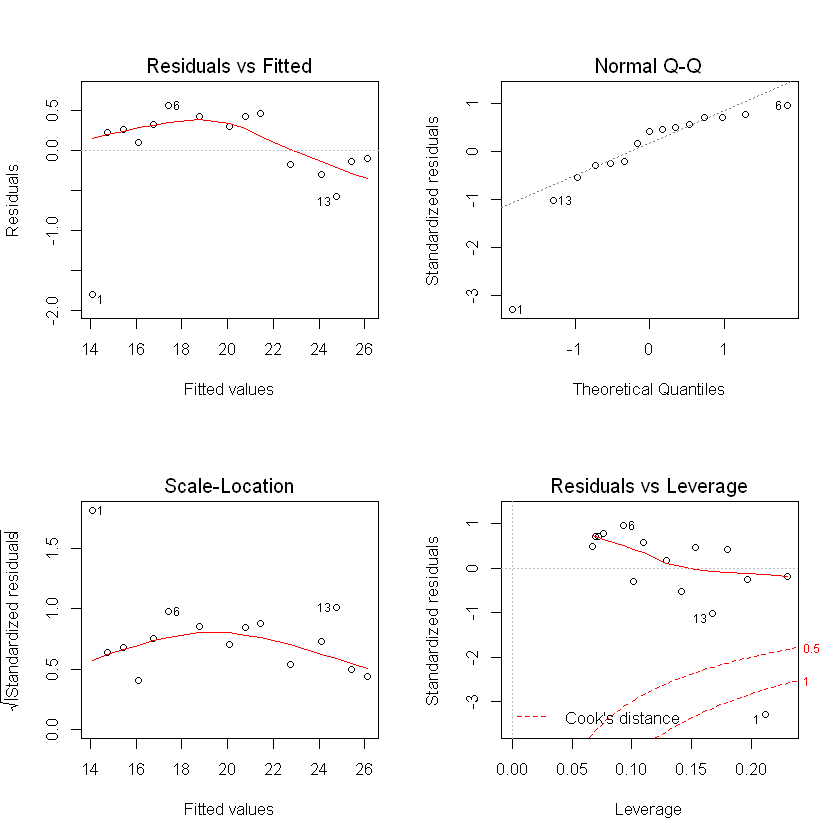

In [30]:
par(mfrow=c(2,2))
plot(ajuste8)

O gráfico dos resíduos padronizados versus valores previstos não apresentam quebra do pressuposto de homocedasticidade da variância dos resíduos. No entanto, o gráfico de normalidade dos resíduos apresenta sinais de quebra do pressuposto de normalidade dos resíduos. Dois testes estatísticos serão apresentados a seguir para validar essa afirmação. O primeiro teste será o teste de Brusch-Pagan que verifica a presença de variância constante nos resíduos (homocedasticidade) e o segundo teste (Shapiro Wilks), verificará a presença de normalidade dos resíduos.

In [31]:
#Teste de Homocedasticidade dos resíduos
require(lmtest)
bptest(ajuste8)

Loading required package: lmtest
Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




	studentized Breusch-Pagan test

data:  ajuste8
BP = 2.2836, df = 1, p-value = 0.1307


Portanto, conforme foi visto no gráfico dos resíduos padronizados versus valores previstos, não é possível rejeitarmos a hipótese de homocedasticidade da variância dos resíduos, ou seja, os resíduos são homocedasticos (variância constantes). O próximo teste irá verificar a normalidade dos dados:

In [32]:
shapiro.test(residuals(ajuste8))


	Shapiro-Wilk normality test

data:  residuals(ajuste8)
W = 0.77662, p-value = 0.001871


Portanto, neste caso, observa-se um p-valor inferior a 5%, indicando que a hipótese nula que afirma que os resíduos possuem um comportamento normal será rejeitada ao nível de 5% de significância.

$\color{red}{\text{Exercício 9}}$ - **Retirado do livro: Análise de Modelos de Regressão Linear com Aplicações, de Charnet, Freire, Charnet e Bonvino** Em uma grande empresa, a taxa de acidentes de trabalho, por milhão de horas/homem de exposição ao risco, nos últimos nove anos, foram as seguintes:

|  Ano | 1989 | 1990 | 1991 | 1992 | 1993 | 1994 | 1995 | 1996 | 1997 |
|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|
| Taxa | 4,75 | 4,58 | 4,34 | 6,20 | 6,09 | 6,30 | 6,51 | 5,88 | 6,55 |

+ a) Estime o MRLS que relaciona a taxa com o ano;
+ b) Calcule os resíduos padronizados do modelo ajustado;
+ c) Construa os gráficos de resíduos e analise-os.

$\color{red}{\text{a)}}$ **O modelo estimado é apresentado a seguir:**

In [33]:
#Entrando com os dados
ano=seq(1989,1997,by=1)
taxa=c(4.75, 4.58, 4.34, 6.20, 6.09, 6.3, 6.51, 5.88, 6.55)

dados9=data.frame(ano,taxa)
ajuste9=lm(taxa~ano,data=dados9)
summary(ajuste9)


Call:
lm(formula = taxa ~ ano, data = dados9)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.83089 -0.33189  0.09711  0.35211  0.77011 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -510.49811  142.71462  -3.577  0.00901 **
ano            0.25900    0.07161   3.617  0.00855 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5547 on 7 degrees of freedom
Multiple R-squared:  0.6514,	Adjusted R-squared:  0.6016 
F-statistic: 13.08 on 1 and 7 DF,  p-value: 0.008545


O modelo estimado é dado por $\hat{y}=-510,49+0,2590X$, indicando que para cada aumento no ano em uma unidade a taxa aumenta em média 0,2590

$\color{red}{\text{b)}}$ **Calcule os resíduos padronizados do modelo ajustado**

In [34]:
residuospadronizados=rstandard(ajuste9)
data.frame(residuospadronizados)


residuospadronizados
0.2219524
-0.6960921
-1.6520072
1.4866317
0.7670162
0.6797195
0.6026579
-1.2288229
-0.3997174


$\color{red}{\text{c)}}$ **Construa o gráfico dos resíduos e comente**

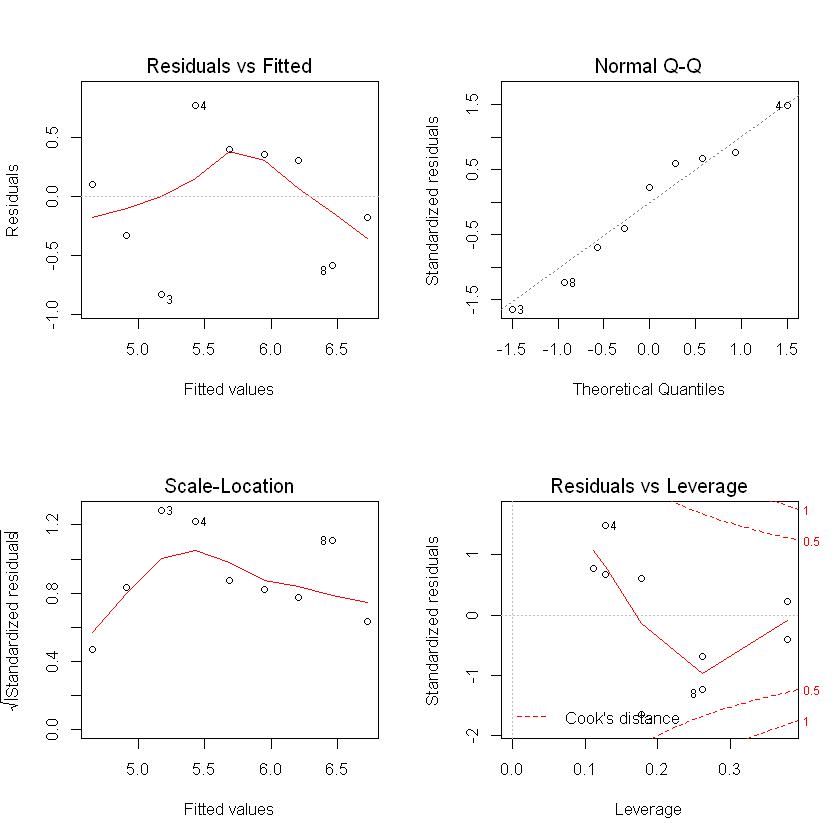

In [35]:
par(mfrow=c(2,2))
plot(ajuste9)

In [36]:
#Teste de Homocedasticidade dos resíduos
bptest(ajuste9)


	studentized Breusch-Pagan test

data:  ajuste9
BP = 0.23642, df = 1, p-value = 0.6268


Os resíduos comportam-se de forma homocedastica, ou seja, a variância dos resíduos são constantes. Esta conclusão só foi possível visto que o p-valor associado ao teste foi de 0,6268 indicando que não existem evidencias amostrais suficientes para rejeitarmos a hipótese de igualdade da variância dos resíduos, ou seja, os resíduos possuem variância constante (homocedasticidade).

In [37]:
#Teste de Normalidade dos resíduos
shapiro.test(residuals(ajuste9))


	Shapiro-Wilk normality test

data:  residuals(ajuste9)
W = 0.96756, p-value = 0.8731


Através do teste de Shapiro-Wilk, constatou-se que os resíduos distribuem-se normalmente, ao nível de 5% de significância.

$\color{red}{\text{Exercício 10}}$ - **Retirado do livro: Análise de Modelos de Regressão Linear com Aplicações, de Charnet, Freire, Charnet e Bonvino** O custo da produção de um lote de uma certa peça depende do número de peças produzidas, ou seja, do tamanho do lote. Em uma amostra de dez lotes observou-se os seguintes resultados:

| Tamanho |  5 |  10 |  15 |  20 |  25 |  30 |  35 |  40 |  45 |  50 |
|:-------:|:--:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|  Custo  | 65 | 120 | 210 | 260 | 380 | 450 | 510 | 555 | 615 | 660 |

+ a) Ajuste um MRLS que explique o custo do lote em termos do seu tamanho;
+ b) Obtenha o coeficiente de determinação;
+ c) Verifique a normalidade dos resíduos;
+ d) Construa o gráfico dos resíduos padronizados contra a variável regressora do modelo.

$\color{red}{\text{a)}}$ **Ajuste um MRLS que explique o custo do lote em termos do seu tamanho**

In [38]:
#Entrada de dados
tamanho=seq(5,50,by=5)
custo=c(65,120,210,260,380,450,510,555,615,660)

base10=data.frame(tamanho,custo)
ajuste10=lm(custo~tamanho,data=base10)
summary(ajuste10)



Call:
lm(formula = custo ~ tamanho, data = base10)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.455 -16.530  -3.924  18.212  33.061 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.6667    16.5735   0.221     0.83    
tamanho      13.7758     0.5342  25.787 5.49e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24.26 on 8 degrees of freedom
Multiple R-squared:  0.9881,	Adjusted R-squared:  0.9866 
F-statistic:   665 on 1 and 8 DF,  p-value: 5.487e-09


O modelo estimado é dado por $\hat{y}=3,6667+12,7758$, indicando que para cada aumento no tamanho em uma unidade o custo aumenta em média 13,77.

$\color{red}{\text{b)}}$ **Obtenha o coeficiente de determinação**

In [39]:
cat("O coeficiente de determinação associado ao modelo é dado por ",round(cor(custo,tamanho)^2*100,2),"%")

O coeficiente de determinação associado ao modelo é dado por  98.81 %

$\color{red}{\text{d)}}$ **A normalidade dos resíduos é dado abaixo**

In [40]:
shapiro.test(residuals(ajuste10))


	Shapiro-Wilk normality test

data:  residuals(ajuste10)
W = 0.91997, p-value = 0.3567


O teste de Shapiro-Wilk apresenta que ao nível de 5% de significância não é possível rejeitarmos a hipótese nula que afirma que os resíduos se distribuem normalmente.

$\color{red}{\text{d)}}$ **Gráfico dos resíduos padronizados contra a variável regressora do modelo**

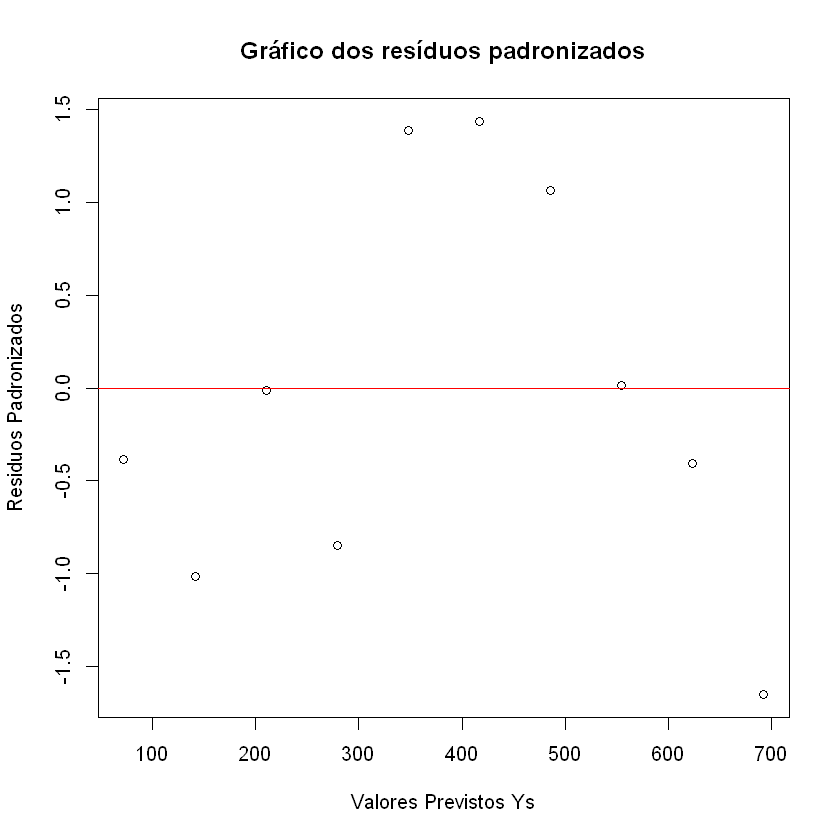

In [41]:
residuos10=rstandard(ajuste10)
previstos=predict(ajuste10)

plot(previstos,residuos10,main="Gráfico dos resíduos padronizados",xlab="Valores Previstos Ys",ylab="Residuos Padronizados")
abline(h=0,col="red")